### Regularized logistic regression

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


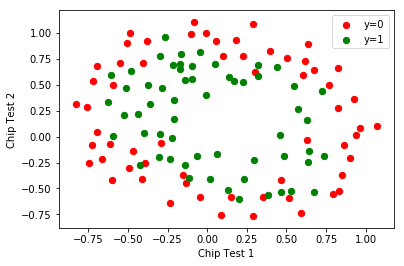

In [1]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

import matplotlib.pyplot as plt
import plot_utils

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
plt.show()
#plt.savefig('fig3.pdf')

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Theta found by fmin_bfgs:  [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]
Final loss =  0.4624583499


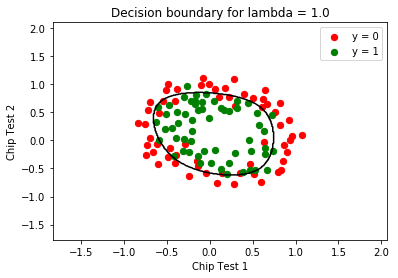

In [2]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 1.0
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print 'Theta found by fmin_bfgs: ',theta_opt
print "Final loss = ", reg_lr1.loss(theta_opt,XX,y,0.0)

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
plt.show()
#plt.savefig('fig4.pdf')

In [3]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)


# TODO: fill in the expression for accuracy of prediction
accuracy = float(np.sum(predy == y)) / predy.shape[0]
print "Accuracy on the training set = ", accuracy

Accuracy on the training set =  0.830508474576


### Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg:  [ 1.1421394   0.60141117  1.16712554 -1.87160974 -0.91574144 -1.26966693
  0.12658629 -0.3686536  -0.34511687 -0.17368655 -1.42387465 -0.04870064
 -0.60646669 -0.26935562 -1.16303832 -0.24327026 -0.20702143 -0.04326335
 -0.28028058 -0.286921   -0.46908732 -1.03633961  0.02914775 -0.29263743
  0.01728096 -0.32898422 -0.13801971 -0.93196832]
Loss with sklearn theta:  0.46843403006


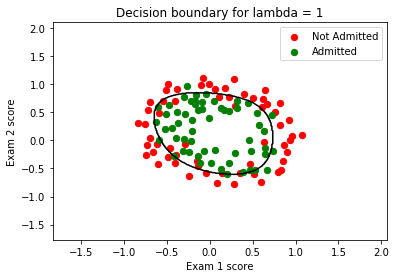

In [4]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg = 1

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print "Theta found by sklearn with L2 reg: ", sk_logreg_l2.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0)

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
#plt.savefig('fig4_sk.pdf')


In [23]:
from sklearn import model_selection
def select_lambda_crossval(X,y,lambda_low,lambda_high,lambda_step,penalty):

    best_lambda = lambda_low

    # Your code here
    # Implement the algorithm above.
    num_folds = 5
    best_accuracy = 0
    kf = model_selection.KFold(n_splits = num_folds)
    for reg in np.arange(lambda_low, lambda_high, lambda_step):
        accuracy = 0;
        for train_index, test_index in kf.split(X):
            X_train = X[train_index]
            y_train = y[train_index]
            X_test = X[test_index]
            y_test = y[test_index]
            if (penalty == "l2"):
                sk_logreg = linear_model.LogisticRegression(C=1.0/reg, solver='lbfgs',fit_intercept=False, penalty=penalty)
            elif (penalty == "l1"):
                sk_logreg = linear_model.LogisticRegression(C=1.0/reg, solver='liblinear',fit_intercept=False,penalty=penalty)
            else:
                raise ValueError("Incorrect penalty type! Penalty can only be l2 or l1.")
#             sk_logreg.fit(X_train, y_train)
            sk_logreg.fit(XX, y)
#             print X_train.shape
            y_pred = sk_logreg.predict(X_test)
#             y_pred = bin_features(X_test.dot(sk_logreg.coef_[0]))
#             print y_pred
#             print y_test
            cur_accuracy= float(np.sum(y_pred == y_test)) / y_test.shape[0]
#             print "lambda = ", reg, ", accuracy = ", cur_accuracy      
            accuracy += cur_accuracy
            # plot_utils.plot_decision_boundary_sklearn(X_train, y_train, sk_logreg, 'Chip Test 1', 'Chip Test 2',['y = 0','y = 1']):
        accuracy = accuracy / num_folds
        print "lambda = ", reg, ", accuracy = ", accuracy     
        if (accuracy > best_accuracy):
            best_accuracy = accuracy
            best_lamnbda = reg
        
    # end your code

    return best_lambda
select_lambda_crossval(XX,y,0.1,2,0.1, "l2")

lambda =  0.1 , accuracy =  0.838043478261
lambda =  0.2 , accuracy =  0.83768115942
lambda =  0.3 , accuracy =  0.828985507246
lambda =  0.4 , accuracy =  0.828985507246
lambda =  0.5 , accuracy =  0.820289855072
lambda =  0.6 , accuracy =  0.811956521739
lambda =  0.7 , accuracy =  0.811956521739
lambda =  0.8 , accuracy =  0.811956521739
lambda =  0.9 , accuracy =  0.811956521739
lambda =  1.0 , accuracy =  0.820289855072
lambda =  1.1 , accuracy =  0.828623188406
lambda =  1.2 , accuracy =  0.828623188406
lambda =  1.3 , accuracy =  0.828623188406
lambda =  1.4 , accuracy =  0.820289855072
lambda =  1.5 , accuracy =  0.820289855072
lambda =  1.6 , accuracy =  0.820289855072
lambda =  1.7 , accuracy =  0.820289855072
lambda =  1.8 , accuracy =  0.820289855072
lambda =  1.9 , accuracy =  0.820289855072


0.1

In [19]:
from sklearn import model_selection
import utils

def select_lambda_crossval_1(X,y,lambda_low,lambda_high,lambda_step,penalty):

    best_lambda = lambda_low

    # Your code here
    # Implement the algorithm above.
    best_accuracy = 0.0
    
    for reg in np.arange(lambda_low, lambda_high, lambda_step):
        kf = model_selection.KFold(10)
        accuracy = 0.0
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            if penalty == 'l2':
                sk_logreg_l2 = linear_model.LogisticRegression(penalty=penalty, C=1.0/reg,solver='lbfgs',fit_intercept=True)
            elif penalty == 'l1':
                sk_logreg_l2 = linear_model.LogisticRegression(penalty=penalty, C=1.0/reg,solver='liblinear',fit_intercept=True)
            else:
                raise ValueError("Penalty must be l1 or l2") 
            sk_logreg_l2.fit(XX,y)
            predy = utils.bin_features( X_test.dot(sk_logreg_l2.coef_[0]) )
            accuracy += float(np.sum(predy == y_test)) / y_test.shape[0]
        print reg," Accuracy: ", accuracy/10
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lambda = reg
        
    # end your code

    return best_lambda

select_lambda_crossval_1(XX,y, 0.1, 5,0.1,"l2")

0.1  Accuracy:  0.533333333333
0.2  Accuracy:  0.533333333333
0.3  Accuracy:  0.541666666667
0.4  Accuracy:  0.55
0.5  Accuracy:  0.55
0.6  Accuracy:  0.55
0.7  Accuracy:  0.55
0.8  Accuracy:  0.541666666667
0.9  Accuracy:  0.541666666667
1.0  Accuracy:  0.541666666667
1.1  Accuracy:  0.541666666667
1.2  Accuracy:  0.541666666667
1.3  Accuracy:  0.541666666667
1.4  Accuracy:  0.533333333333
1.5  Accuracy:  0.533333333333
1.6  Accuracy:  0.533333333333
1.7  Accuracy:  0.533333333333
1.8  Accuracy:  0.533333333333
1.9  Accuracy:  0.533333333333
2.0  Accuracy:  0.533333333333
2.1  Accuracy:  0.533333333333
2.2  Accuracy:  0.533333333333
2.3  Accuracy:  0.533333333333
2.4  Accuracy:  0.533333333333
2.5  Accuracy:  0.533333333333
2.6  Accuracy:  0.533333333333
2.7  Accuracy:  0.533333333333
2.8  Accuracy:  0.533333333333
2.9  Accuracy:  0.533333333333
3.0  Accuracy:  0.533333333333
3.1  Accuracy:  0.533333333333
3.2  Accuracy:  0.533333333333
3.3  Accuracy:  0.533333333333
3.4  Accuracy:  0

0.40000000000000002

### L1 regularized logistic regre

Theta found by sklearn with L1 reg:  [ 1.86961958  0.68661617  1.28047775 -4.86246381 -1.6218383  -2.34228126
  0.          0.          0.          0.          0.          0.          0.
  0.         -2.36768045  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.        ]
Loss with sklearn theta:  0.438145200917
Computing regularization path ...


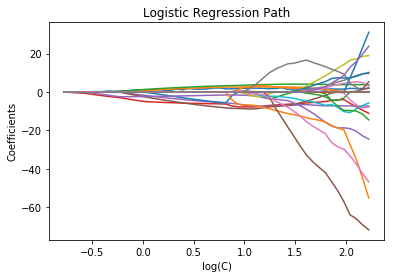

In [5]:
# L1 regularization witk sklearn LogisticRegression

sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print "Theta found by sklearn with L1 reg: ", sk_logreg_l1.coef_[0]
print "Loss with sklearn theta: ", reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0)

# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y)
plt.show()
#plt.savefig('fig5.pdf')